# Machine Learning

<img src="https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2018/03/Types-of-Machine-Learning-Waht-is-Machine-Learning-Edureka-2.png" />

# Classification

<img src="https://whataftercollege.com/wp-content/uploads/2020/05/Classification-of-Machine-Learning.jpg"/>

# Classification Algorithms

* **Logistic Regression:** The most traditional technique; was developed and used prior to ML; fits data to a "sigmoidal" (s-shaped) curve; fit coefficients are interpretable
* **K Nearest Neighbors (KNN):** A more intuitive method; nearby points are part of the same class; fits can have complex shapes
* **Support Vector Machines (SVM):** Developed for linear separation (i.e., find the optimal "line" to separate classes; can be extended to curved lines through different "kernels"
* **Decision Trees:** Uses binary (yes/no) questions about the features to fit classes; can be used with numerical and categorical input
* **Random Forest:** A collection of randomized decision trees; less prone to overfitting than decision trees; can rank importance of features for prediction
* **Gradient Boosted Trees:** An even more robust tree-based algorithm

**We will learn Logisitic Regression, KNN, and SVM, but `sklearn` provides access to the other three methods as well.**

## Generate some data

`make_classification` lets us make fake data and control the kind of data we get.
* `n_features` - the total number of features that can be used in the model
* `n_informative` - the total number of features that provide unique information for classes
    * say 2, so $x_0$ and $x_1$
* `n_redundant` - the total number of features that are built from informative features (i.e., have redundant information)
    * say 1, so $x_2 = c_0 x_0 + c_1 x_1$
* `n_class` - the number of class labels (default 2: 0/1)
* `n_clusters_per_class` - the number of clusters per class

In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
from sklearn.datasets import make_classification

features, class_labels = make_classification(n_samples = 1000,
                                             n_features = 3, 
                                             n_informative = 2, 
                                             n_redundant = 1, 
                                             n_clusters_per_class=1, 
                                             random_state=201)

/var/folders/5_/9z7lhk0s2y95hvkzs6lzdvvc0000gn/T/ipykernel_33239/20557457.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=135)


Text(0.5, 0, 'feature 2')

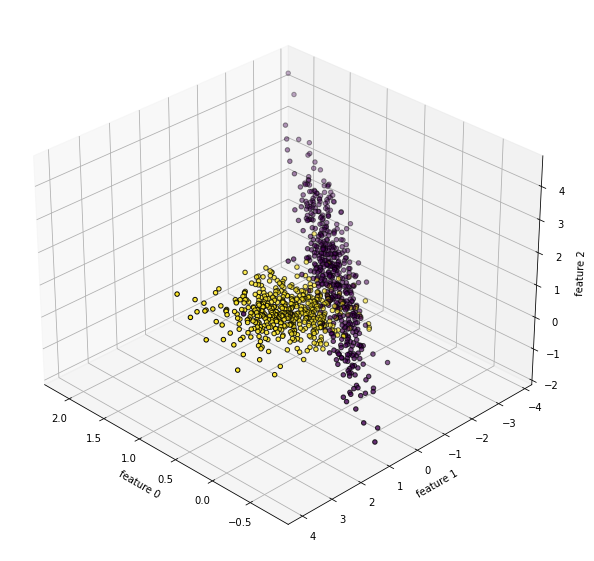

In [2]:
## Let's look at these 3D data
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=135)

xs = features[:, 0]
ys = features[:, 1]
zs = features[:, 2]

ax.scatter3D(xs, ys, zs, c=class_labels, ec='k')
ax.set_xlabel('feature 0')
ax.set_ylabel('feature 1')
ax.set_zlabel('feature 2')

/var/folders/5_/9z7lhk0s2y95hvkzs6lzdvvc0000gn/T/ipykernel_33239/3607022041.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=15, azim=90)


Text(0.5, 0, 'feature 2')

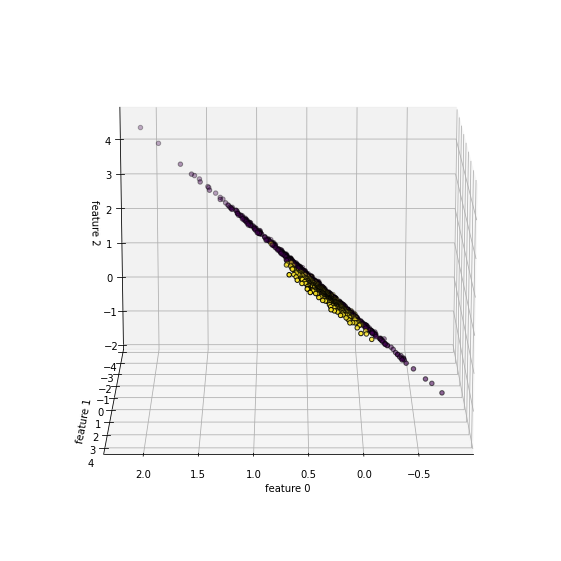

In [3]:
## From a different angle, we see the 2D nature of the data
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=15, azim=90)

xs = features[:, 0]
ys = features[:, 1]
zs = features[:, 2]

ax.scatter3D(xs, ys, zs, c=class_labels, ec = 'k')
ax.set_xlabel('feature 0')
ax.set_ylabel('feature 1')
ax.set_zlabel('feature 2')

## Feature Subspaces
For higher dimensions, we have take 2D slices of the data (called "projections" or "subspaces")

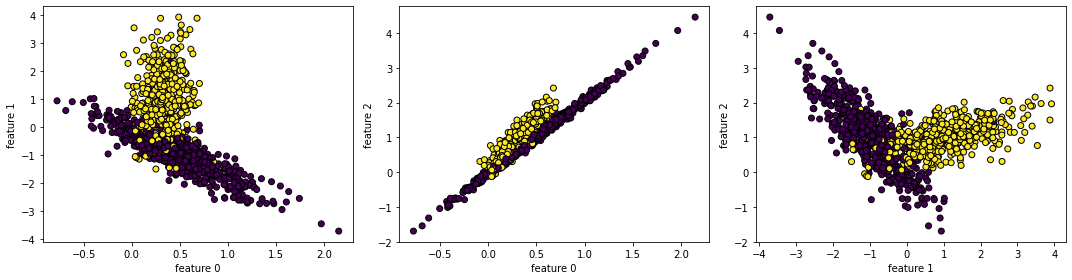

In [4]:
f, axs = plt.subplots(1,3,figsize=(15,4))
plt.subplot(131)
plt.scatter(features[:, 0], features[:, 1], marker = 'o', c = class_labels, ec = 'k')
plt.xlabel('feature 0')
plt.ylabel('feature 1')

plt.subplot(132)
plt.scatter(features[:, 0], features[:, 2], marker = 'o', c = class_labels, ec = 'k')
plt.xlabel('feature 0')
plt.ylabel('feature 2')

plt.subplot(133)
plt.scatter(features[:, 1], features[:, 2], marker = 'o', c = class_labels, ec = 'k')
plt.xlabel('feature 1')
plt.ylabel('feature 2')

plt.tight_layout()

## What about Logistic Regression?

Logistic Regression attempts to fit a sigmoid (S-shaped) function to your data. This shapes assumes that the probability of finding class 0 versus class 1 increases as the feature changes value.

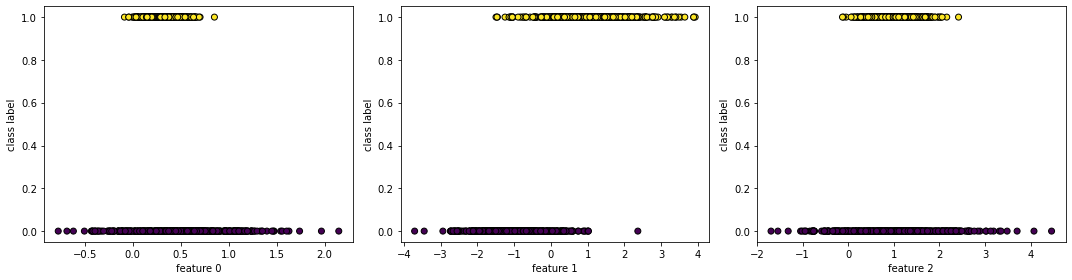

In [5]:
f, axs = plt.subplots(1,3,figsize=(15,4))
plt.subplot(131)
plt.scatter(features[:,0], class_labels, c=class_labels, ec='k')
plt.xlabel('feature 0')
plt.ylabel('class label')

plt.subplot(132)
plt.scatter(features[:,1], class_labels, c=class_labels, ec='k')
plt.xlabel('feature 1')
plt.ylabel('class label')

plt.subplot(133)
plt.scatter(features[:,2], class_labels, c=class_labels, ec='k')
plt.xlabel('feature 2')
plt.ylabel('class label')

plt.tight_layout()

# Questions, Comments, Concerns?